# Data examination and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
PATH = 'drive/MyDrive/Data_mining/House_prices/'
train_data, test_data = pd.read_csv(PATH + 'train.csv'), pd.read_csv(PATH + 'test.csv')

In [ ]:
display(train_data.head(10))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
display(test_data.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Dealing with missing values

In [ ]:
# drop ID column
test_ids = test_data['Id']
train_data.drop('Id', axis = 1, inplace = True)
test_data.drop('Id', axis = 1, inplace = True)

In [ ]:
# get target variable
train_prices = train_data['SalePrice']
train_data.drop('SalePrice', axis = 1, inplace = True)

In [ ]:
na_values = train_data.isna().sum()
#print(na_values[na_values != 0])



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [ ]:
test_na_values = test_data.isna().sum()
#print(test_na_values[test_na_values != 0])
print(test_na_values[test_na_values != 0].sort_values(ascending=False))

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [ ]:
# unique values for features with most na values
columns_with_na = na_values[na_values != 0].sort_values(ascending=False).index.tolist()
test_columns_with_na = test_na_values[test_na_values != 0].sort_values(ascending=False).index.tolist()
for f in columns_with_na+test_columns_with_na:
  print(f'{f} values:', train_data[f].unique())

PoolQC values: [nan 'Ex' 'Fa' 'Gd']
MiscFeature values: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley values: [nan 'Grvl' 'Pave']
Fence values: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu values: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage values: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageType values: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt values: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 196

**Checking missing values (based on data description):**

PoolQC          1453: valid value

MiscFeature     1406: valid value

Alley           1369: valid value

Fence           1179: valid value

FireplaceQu      690: valid value

LotFrontage      259: needs mean substitution (Linear feet of street connected to property)

GarageType        81: valid value

GarageYrBlt       81: valid value

GarageFinish      81: valid value

GarageQual        81: valid value

GarageCond        81: valid value

BsmtExposure      38: valid value

BsmtFinType2      38: valid value

BsmtFinType1      37: valid value

BsmtCond          37: valid value

BsmtQual          37: valid value

MasVnrArea         8: valid value

MasVnrType         8: nan should be replaced with None

Electrical         1: should be replaced with most common category

MSZoning           4: should be replaced with most common category

BsmtFullBath       2: nan should be replaced with 0

BsmtHalfBath       2: nan should be replaced with 0

Functional         2: should be replaced with most common category

Utilities          2: should be replaced with most common category

GarageCars         1: nan should be replaced with 0

GarageArea         1: nan should be replaced with 0

TotalBsmtSF        1: nan should be replaced with 0

KitchenQual        1: nan should be replaced with most common category

BsmtUnfSF          1: nan should be replaced with 0

BsmtFinSF2         1: nan should be replaced with 0

BsmtFinSF1         1: nan should be replaced with 0

Exterior2nd        1: nan should be replaced with most common category

Exterior1st        1: nan should be replaced with most common category

SaleType           1: nan should be replaced with most common category

(valid value means that nan is a valid option for that feature, not a missing value)

### Further checks for missing values

In [ ]:
# checking values of 'GarageType' column in cases where 'GarageYrBlt' is nan
nan_y_rows = train_data[train_data['GarageYrBlt'].isna()]
print(nan_y_rows['GarageType'].unique())

[nan]


In [ ]:
# checking values of 'MasVnrType' column in cases where 'MasVnrArea' is nan
nan_y_rows = train_data[train_data['MasVnrArea'].isna()]
print(nan_y_rows['MasVnrType'].unique())

[nan]


In [ ]:
x_values_based_on_y_none = train_data.loc[train_data['MasVnrType'].isnull(), 'MasVnrArea']
print(x_values_based_on_y_none)

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64


In [ ]:
print(train_data['Electrical'].value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [ ]:
print(train_data['MSZoning'].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


### Substituting missing values

In [ ]:
# performing missing value substitutions based on above results
# unique substitutions
train_data['MasVnrType'] = train_data['MasVnrType'].fillna('None')
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)

# substitutions with 0
for c in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']:
  test_data[c].fillna(0, inplace=True)
  train_data[c].fillna(0, inplace=True)

# substitutions with most common value for categorical features
for f in ['Electrical', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType']:
    most_common_value = train_data[f].mode()[0]
    train_data[f].fillna(most_common_value, inplace=True)
    test_data[f].fillna(most_common_value, inplace=True)

# substituting all others with 'NA' (these are the valid nan values)
for i in train_data.columns:
  train_data[i].fillna('NA', inplace=True)
  test_data[i].fillna('NA', inplace=True)

In [ ]:
display(test_data.head(5))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


## Checking correlations

In [ ]:
# get categoric and numeric columns
cat_cols = train_data.columns[train_data.dtypes == object]
num_cols = train_data.columns[train_data.dtypes != object]

In [ ]:
# analyzing correlations
num_corr_matrix = train_data[num_cols].corr()

# checking strong correlations - those above +/-0.7 correlation value
strong_correlations = num_corr_matrix[((num_corr_matrix > 0.7) | (num_corr_matrix < -0.7))]

strong_correlation_list = [(', '.join(sorted([index, column])), strong_correlations.loc[index, column]) for index in strong_correlations.index for column in strong_correlations.columns if index != column and not np.isnan(strong_correlations.loc[index, column])]

for correlation in set(strong_correlation_list):
    print(correlation)

('1stFlrSF, TotalBsmtSF', 0.8195299750050339)
('GarageArea, GarageCars', 0.882475414281462)
('GrLivArea, TotRmsAbvGrd', 0.8254893743088425)


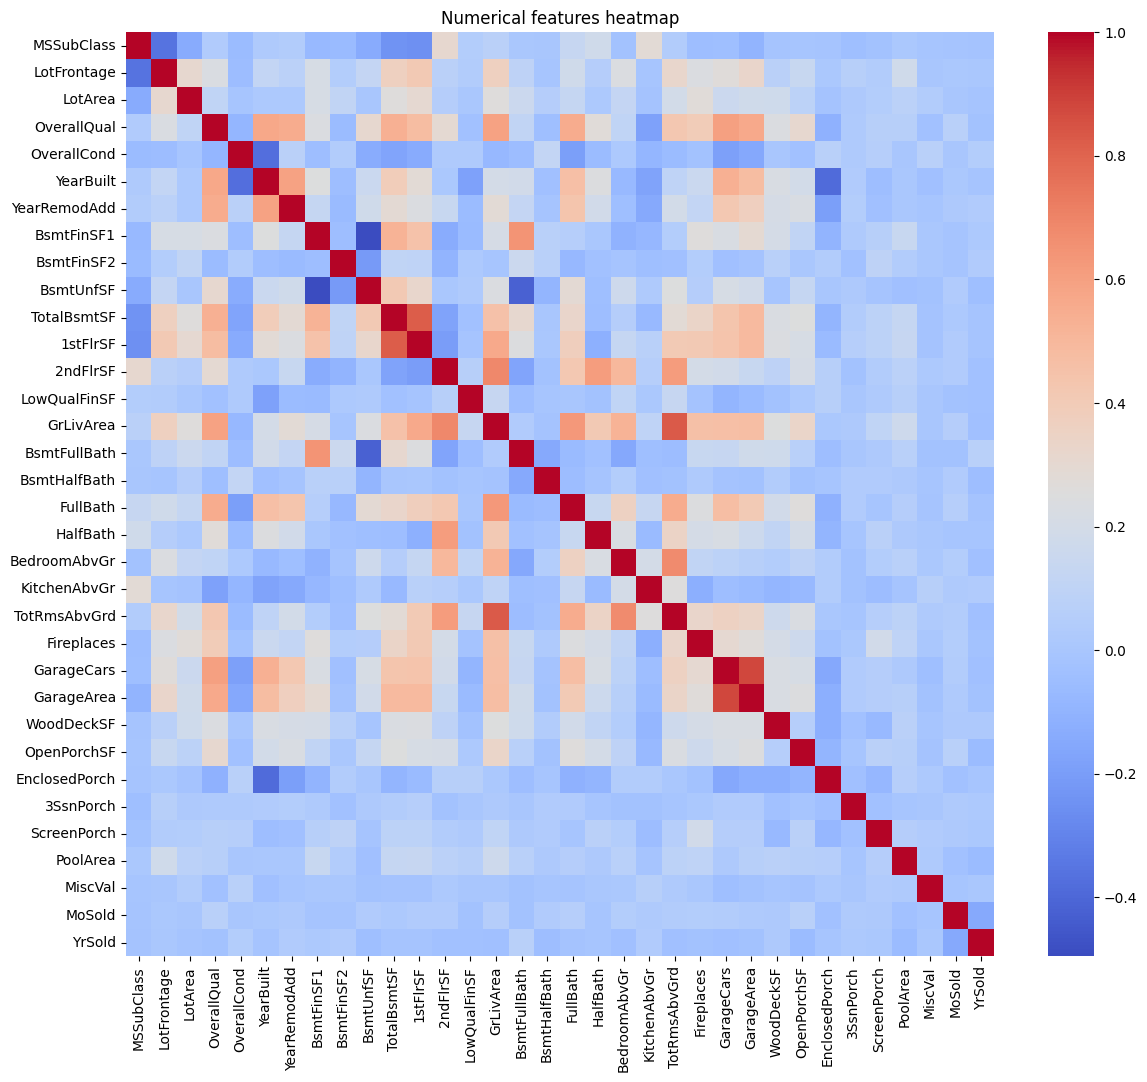

In [ ]:
plt.figure(figsize=(14, 12))
correlation_matrix = num_corr_matrix
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Numerical features heatmap')
plt.show()

In [ ]:
# dropping 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd' as they are strongly correlating with other features, and do not contain additional info
train_data = train_data.drop(columns=['GarageCars', 'TotRmsAbvGrd'])
test_data = test_data.drop(columns=['GarageCars', 'TotRmsAbvGrd'])

## Creating numeric representation

In [ ]:
train_data['Train'] = True
test_data['Train'] = False
data = pd.concat([train_data, test_data])

In [ ]:
cat_cols = data.columns[data.dtypes == object]
print(cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# encoding ordinal categorical variables
data['LotShape'] = data['LotShape'].map({'Reg':1, 'IR1':2, 'IR2':3,'IR3':4})
data['Utilities'] = data['Utilities'].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3,'ELO':4})
data['ExterQual'] = data['ExterQual'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5})
data['ExterCond'] = data['ExterCond'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5})
data['BsmtQual'] = data['BsmtQual'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5, 'NA':6})
data['BsmtCond'] = data['BsmtCond'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5, 'NA':6})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd':1, 'Av':2, 'Mn':3,'No':4, 'NA':5})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ':1, 'ALQ':2, 'BLQ':3,'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ':1, 'ALQ':2, 'BLQ':3,'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
data['HeatingQC'] = data['HeatingQC'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5})
data['KitchenQual'] = data['KitchenQual'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5, 'NA':6})
data['GarageFinish'] = data['GarageFinish'].map({'Fin':1, 'RFn':2, 'Unf':3,'NA':4})
data['GarageQual'] = data['GarageQual'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5, 'NA':6})
data['GarageCond'] = data['GarageCond'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'Po':5, 'NA':6})
data['GarageType'] = data['GarageType'].map({'2Types':1, 'Attchd':2, 'Basment':3,'BuiltIn':4, 'CarPort':5, 'Detchd':6, 'NA':7})
data['PoolQC'] = data['PoolQC'].map({'Ex':1, 'Gd':2, 'TA':3,'Fa':4, 'NA':5})
data['Functional'] = data['Functional'].map({'Typ':1, 'Min1':2, 'Min2':3,'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})

In [ ]:
data['Functional'].unique()

array([1, 2, 5, 3, 4, 6, 7])

In [ ]:
# creating one hot / binary encoding for the rest of the categorical variables
cat_cols = data.columns[data.dtypes == object]
for col_name in cat_cols:
    if col_name == 'Train':
        continue
    dummies = pd.get_dummies(data[col_name], prefix = col_name, drop_first = (len(pd.unique(data[col_name])) <= 2))
    data = pd.concat([data.drop(col_name, axis = 1), dummies], axis = 1)

## Feature engineering

In [ ]:
# summing total area
#data['TotalArea'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF'] + data['GarageArea']

# bathrooms
#data['TotalBathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

# house age
#data['HouseAge'] = data['YrSold'] - data['YearBuilt']

# combining total area and house quality
#data['AreaQuality'] = data['TotalArea'] * data['OverallQual']


In [ ]:
# dropping features that were combined
#data = data.drop(columns=['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'YrSold', 'YearBuilt', 'TotalArea', 'OverallQual'])

# Fitting models to data

In [ ]:
# re-splitting train and test data
train_data = data[data['Train']].drop('Train', axis = 1)
test_data = data[~data['Train']].drop('Train', axis = 1)

In [ ]:
train_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,1,7,5,2003,2003,2,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,1,1,6,8,1976,1976,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,2,1,7,5,2001,2002,2,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,2,1,7,5,1915,1970,3,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,2,1,8,5,2000,2000,2,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Hyperparameter optimisation

In [ ]:
# trying out model

# train-validation split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_prices, test_size = 0.25)
model = DecisionTreeRegressor()
model = model.fit(x_train, y_train)

# evaluation
y_hat = model.predict(x_val)
error = MSLE(y_val, y_hat, squared = False)
print(f'Root mean squared logarithmic error on validation set: {error}')

Root mean squared logarithmic error on validation set: 0.22250928528578


In [ ]:
# cross-validate

def cross_validate(model, k = 100):
    train_errors, val_errors = [], []
    for _ in range(k):
        x_train, x_val, y_train, y_val = train_test_split(train_data, train_prices, test_size = 0.25)
        model = model.fit(x_train, y_train)

        train_pred = model.predict(x_train)
        train_error = MSLE(y_train, train_pred, squared = False)
        train_errors.append(train_error)

        val_pred = model.predict(x_val)
        val_error = MSLE(y_val, val_pred, squared = False)
        val_errors.append(val_error)

    train_errors, val_errors = np.array(train_errors), np.array(val_errors)
    return train_errors.mean(), train_errors.std(), val_errors.mean(), val_errors.std()

train_mean, train_std, val_mean, val_std = cross_validate(model)
print(f'Train MSLE mean: {train_mean}, STD: {train_std}')
print(f'Validation RMSLE mean: {val_mean}, STD: {val_std}')

Train MSLE mean: 0.0, STD: 0.0
Validation RMSLE mean: 0.20867882815037095, STD: 0.012054697145210848


### Optimal depth

In [ ]:
# finding optimal depth
depths, train_errors, val_errors = [], [], []

for d in range(1, 30):
    model = DecisionTreeRegressor(max_depth = d)
    train_error, _, val_error, _ = cross_validate(model, k = 20)
    depths.append(d)
    train_errors.append(train_error)
    val_errors.append(val_error)

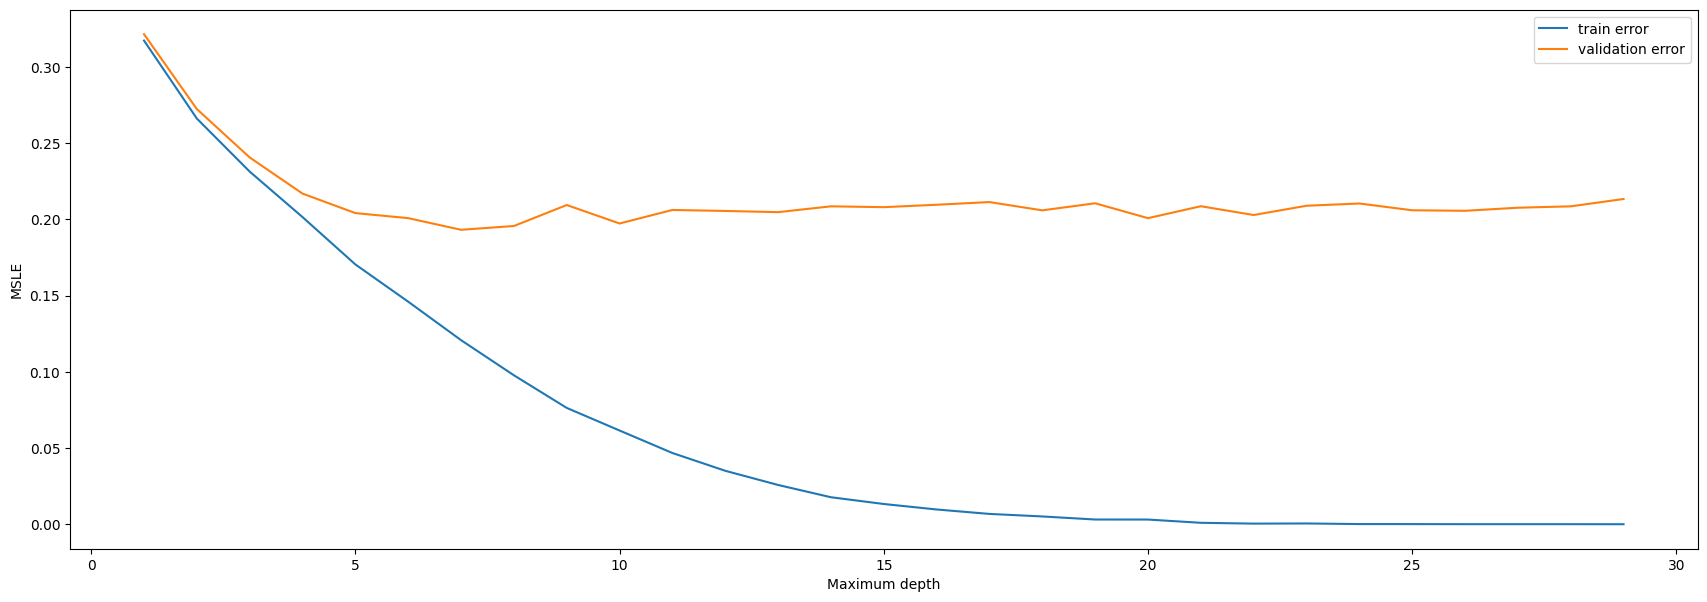

In [ ]:
plt.figure(figsize = (21, 7))
plt.plot(depths, train_errors, label = 'train error')
plt.plot(depths, val_errors, label = 'validation error')
plt.xlabel('Maximum depth')
plt.ylabel('MSLE')
plt.legend()
plt.show()

In [ ]:
best_depth = depths[np.array(val_errors).argmin()]
print(f'Best depth: {best_depth}')

Best depth: 7


### Running model with optimal depth

In [ ]:
# get predictions
model = DecisionTreeRegressor(max_depth = best_depth)
model.fit(train_data, train_prices)
test_preds = model.apply(test_data)

In [ ]:
# cross-validating
train_mean, train_std, val_mean, val_std = cross_validate(model)
print(f'Train MSLE mean: {train_mean}, STD: {train_std}')
print(f'Validation RMSLE mean: {val_mean}, STD: {val_std}')

Train MSLE mean: 0.1198161590533946, STD: 0.005351799860057337
Validation RMSLE mean: 0.2000514589605498, STD: 0.014004185358547108


### Grid search

In [ ]:
model = DecisionTreeRegressor()

# defining parameter grid
parameter_grid = {
    'max_depth': [10, 11, 12, 13, 14],  #listing values around previous best depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

val_preds = best_model.predict(x_val)
best_params = grid_search.best_params_

print("Best parameters:", best_params)

# running model with best parameters
model = DecisionTreeRegressor(**best_params)

# cross-validating
train_mean, train_std, val_mean, val_std = cross_validate(model)
print(f'Train MSLE mean: {train_mean}, STD: {train_std}')
print(f'Validation RMSLE mean: {val_mean}, STD: {val_std}')

Best parameters: {'max_depth': 12, 'min_samples_leaf': 9, 'min_samples_split': 4}
Train MSLE mean: 0.12789599108243319, STD: 0.0035717878049269544
Validation RMSLE mean: 0.18942758520255373, STD: 0.011600656072223683


## Submitting test results

In [ ]:
# get predictions
model.fit(train_data, train_prices)
test_preds = model.predict(test_data)

In [ ]:
submission_df = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})
display(submission_df.head(5))

,Id,SalePrice
0,1461,151166.666667
1,1462,163400.000000
2,1463,174825.000000
3,1464,145752.461538
4,1465,212995.111111


In [ ]:
# save submission to csv
submission_df.to_csv('/content/drive/MyDrive/Data_mining/House_prices/my_submission.csv', index = False)